# **LAB 3 - PART 3 Classification**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
from sklearn import model_selection
pd.options.display.float_format = "{:.3f}".format

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report


#### **Read csv file**

In [ ]:
### START CODE HERE ###
df = pd.read_csv("/content/Coffee-modified.csv")
### END CODE HERE ###

Select only `['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
         'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']`

In [ ]:
selected_columns = ['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']

# Assuming 'df' is the DataFrame you've read from the file
df = df[selected_columns]

df


,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,2075.000
1,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,2075.000
2,89.750,Arabica,Guatemala,NaN,8.420,8.500,8.420,8.420,8.330,8.420,10.000,0.000,1700.000
3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,2000.000
4,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,2075.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,1100.000
1309,59.830,Arabica,Guatemala,Washed / Wet,7.500,6.670,6.670,7.670,7.330,6.670,8.000,0.100,1417.320


**Drop NA**


In [ ]:
df = df.dropna()

In [ ]:
### START CODE HERE ###

### END CODE HERE ###
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1003 non-null   float64
 1   Species               1003 non-null   object 
 2   Country.of.Origin     1003 non-null   object 
 3   Processing.Method     1003 non-null   object 
 4   Aroma                 1003 non-null   float64
 5   Flavor                1003 non-null   float64
 6   Aftertaste            1003 non-null   float64
 7   Acidity               1003 non-null   float64
 8   Body                  1003 non-null   float64
 9   Balance               1003 non-null   float64
 10  Uniformity            1003 non-null   float64
 11  Moisture              1003 non-null   float64
 12  altitude_mean_meters  1003 non-null   float64
dtypes: float64(10), object(3)
memory usage: 109.7+ KB


,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,1816.792
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,9112.473
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,1100.000
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,1310.640
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,1600.000
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,190164.000


Let's `Y` be  `Total.Cup.Points` and X be the rest except in  `Y`.

In [ ]:
### START CODE HERE ###
Y = df.drop(columns=['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters'])
X = df.drop(columns=['Total.Cup.Points'])

### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- X : `['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture','altitude_mean_meters']`
- Y : `['Total.Cup.Points']`

</details>

In [ ]:
print("X : ",X.columns.tolist())
print("Y : ",Y.columns.tolist())

X :  ['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']
Y :  ['Total.Cup.Points']


**Labeling Bean_grade value using percentile**

- Bean_grade = 1 ; `if Y < rating_pctile[0] 75 percentile`
- Bean_grade = 2 ; `if rating_pctile[0] <= Y < rating_pctile[1] 90 percentile`
- Bean_grade = 3 ; `if Y >= rating_pctile[1]`


In [ ]:
### START CODE HERE ###

# Calculate percentiles
rating_pctiles = np.percentile(Y, [75, 90])

# Define function to label Bean_grade
def label_bean_grade(score):
    if score < rating_pctiles[0]:
        return 1
    elif score < rating_pctiles[1]:
        return 2
    else:
        return 3


Y= Y['Total.Cup.Points'].apply(label_bean_grade)
### END CODE HERE ###
Y

0       3
1       3
3       3
4       3
9       3
       ..
1305    1
1306    1
1307    1
1308    1
1309    1
Name: Total.Cup.Points, Length: 1003, dtype: int64

**Plot Bar graph that show count of each `Bean_grade`.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.


</details>

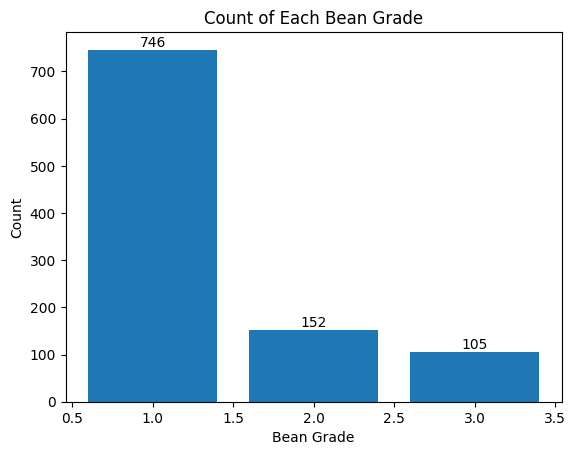

In [ ]:
### START CODE HERE ###

# Count the occurrences of each Bean_grade
bean_grade_counts = Y.value_counts()

# Plotting the bar graph
plt.bar(bean_grade_counts.index, bean_grade_counts.values)

# Adding labels and title
plt.xlabel('Bean Grade')
plt.ylabel('Count')
plt.title('Count of Each Bean Grade')

# Adding annotations
for i, count in enumerate(bean_grade_counts.values):
    plt.text(i + 1, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()
### END CODE HERE ###

**Standardize X's numeric data**

In [ ]:
### START CODE HERE ###

# Select only the numeric columns from X
numeric_x= X.select_dtypes(include=['float64', 'int64'])

standard_scaler = preprocessing.StandardScaler()

# # Fit the scaler to the numeric data and transform it
X[numeric_x.columns] = standard_scaler.fit_transform(X[numeric_x.columns])

### END CODE HERE ###

In [ ]:
X[numeric_x.columns]


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,3.660,4.058,3.862,3.978,3.651,2.703,0.292,0.576,0.028
1,3.926,3.565,3.351,3.425,3.358,2.703,0.292,0.576,0.028
3,2.000,3.288,3.110,2.905,3.651,2.204,0.292,0.346,0.020
4,2.266,3.041,2.599,3.165,3.358,2.439,0.292,0.576,0.028
9,1.702,3.288,3.351,3.165,0.608,2.703,0.292,0.115,0.001
...,...,...,...,...,...,...,...,...,...
1305,-1.884,-3.650,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040
1306,-1.618,-2.108,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101
1307,-2.714,-2.879,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161
1308,-1.054,-2.879,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079


**Drop the columns that have correlation more than 0.8.**

In [ ]:
### START CODE HERE ###

correlation_matrix = numeric_x.corr()
numeric_columns = numeric_x.columns

to_drop = [ ]
for c1 in numeric_columns:
  for c2 in numeric_columns:
    if c1 != c2 and c2 not in to_drop and correlation_matrix[c1][c2] > 0.8:
      to_drop.append(c1)

X.drop(columns=to_drop,inplace=True)

### END CODE HERE ###

In [ ]:
X

,Species,Country.of.Origin,Processing.Method,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,3.660,3.862,3.978,3.651,2.703,0.292,0.576,0.028
1,Arabica,Ethiopia,Washed / Wet,3.926,3.351,3.425,3.358,2.703,0.292,0.576,0.028
3,Arabica,Ethiopia,Natural / Dry,2.000,3.110,2.905,3.651,2.204,0.292,0.346,0.020
4,Arabica,Ethiopia,Washed / Wet,2.266,2.599,3.165,3.358,2.439,0.292,0.576,0.028
9,Arabica,Ethiopia,Natural / Dry,1.702,3.351,3.165,0.608,2.703,0.292,0.115,0.001
...,...,...,...,...,...,...,...,...,...,...,...
1305,Arabica,Honduras,Washed / Wet,-1.884,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040
1306,Arabica,Mexico,Washed / Wet,-1.618,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101
1307,Arabica,Haiti,Natural / Dry,-2.714,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161
1308,Arabica,Nicaragua,Other,-1.054,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079


**One hot encode non-numeric columns**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.get_dummies()`
</details>

In [ ]:
non_numeric_x = X.select_dtypes(exclude=['float64', 'int64'])
X = pd.get_dummies(X, columns=non_numeric_x.columns)

X

,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters,Species_Arabica,Country.of.Origin_Brazil,...,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,3.660,3.862,3.978,3.651,2.703,0.292,0.576,0.028,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3.926,3.351,3.425,3.358,2.703,0.292,0.576,0.028,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2.000,3.110,2.905,3.651,2.204,0.292,0.346,0.020,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2.266,2.599,3.165,3.358,2.439,0.292,0.576,0.028,1,0,...,0,0,0,0,0,0,0,0,0,1
9,1.702,3.351,3.165,0.608,2.703,0.292,0.115,0.001,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-1.884,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,-1.618,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101,1,0,...,0,0,0,0,0,0,0,0,0,1
1307,-2.714,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161,1,0,...,0,0,0,0,0,1,0,0,0,0
1308,-1.054,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079,1,0,...,0,0,0,0,0,0,1,0,0,0


**Split the training set into 70% for training and the remaining 30% for the test set.**

In [ ]:
### START CODE HERE ###

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### START CODE HERE ###


### **Grid Search**
**Initialize models and Search Space**
- `Support Vector Machine`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###

kernels = ['linear','rbf','poly']
grid_search_c_value = [0.1,10, 100]
grid_search_gamma = [0.01,0.1,1]
grid_search_degree = [2,3]

param_grid = {
    'kernel': kernels,
    'C': grid_search_c_value,
    'gamma': grid_search_gamma,
    'degree': grid_search_degree
}

svc_model = SVC()
k = [3, 6]
### END CODE HERE ###

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [ ]:
### START CODE HERE ###
k_values = [4, 6]

# Perform grid search for each value of k
for k in k_values:
    grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=k)
    grid_search.fit(X_train, Y_train)  # You need to specify your data X and y

    print(f"Best parameters for k={k}: {grid_search.best_params_}")
    print(f"Best score for k={k}: {grid_search.best_score_}")

    # Print mean and standard deviation of scores for all parameter sets
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    params = grid_search.cv_results_['params']
    print(f"Mean and standard deviation of scores for k={k}:")
    for mean, std, param in zip(means, stds, params):
        print(f"Parameters: {param}, Mean: {mean}, Std: {std}")
    print()

top_params_grid = []
for i in range(3):
    best_grid = grid_search.cv_results_['params'][i]
    top_params_grid.append(best_grid)

print(top_params_grid)
### END CODE HERE ###

Best parameters for k=4: {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best score for k=4: 0.9116558441558441
Mean and standard deviation of scores for k=4:
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}, Mean: 0.8946022727272727, Std: 0.018975854476349845
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}, Mean: 0.7293506493506493, Std: 0.0020779220779220675
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, Mean: 0.7293506493506493, Std: 0.0020779220779220675
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}, Mean: 0.8946022727272727, Std: 0.018975854476349845
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}, Mean: 0.7720616883116884, Std: 0.010275974025974011
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}, Mean: 0.7735146103896103, Std: 0.007034388003592803
Parameters: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}, Mean: 0.8946022727272727, Std: 0.

Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, create a function to calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[216   7   1]
 [  9  33   4]
 [  0   6  25]]
   Precision  Recall  F1-Score  Support
0      0.960   0.964     0.962      224
1      0.717   0.717     0.717       46
2      0.833   0.806     0.820       31

Accuracy:  0.9102990033222591
```

</details>

In [ ]:
### START CODE HERE ###

best_grid_param = grid_search.best_params_
best_svc_model = SVC(**best_grid_param)
best_svc_model.fit(X_train,Y_train)
Y_pred_grid = best_svc_model.predict(X_test)


print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred_grid))

print("Classifiaction Report")
print(classification_report(Y_test,Y_pred_grid))
### END CODE HERE ###

Confusion Matrix
[[227   7   0]
 [  8  25   2]
 [  1   6  25]]
Classifiaction Report
              precision    recall  f1-score   support

           1       0.96      0.97      0.97       234
           2       0.66      0.71      0.68        35
           3       0.93      0.78      0.85        32

    accuracy                           0.92       301
   macro avg       0.85      0.82      0.83       301
weighted avg       0.92      0.92      0.92       301



**Select 4 pairs of features then polt the decision boundary.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

</details>

In [ ]:
### START CODE HERE ###


X_corr = X.corrwith(Y)
top_features = X_corr.abs().nlargest(4).index
selected_features = X[top_features]

print(selected_features.columns)
### END CODE HERE ####

Index(['Aftertaste', 'Acidity', 'Balance', 'Aroma'], dtype='object')


In [ ]:
X_corr

Aroma                                             0.581
Aftertaste                                        0.628
Acidity                                           0.609
Body                                              0.556
Balance                                           0.591
Uniformity                                        0.136
Moisture                                         -0.099
altitude_mean_meters                             -0.020
Species_Arabica                                     NaN
Country.of.Origin_Brazil                         -0.015
Country.of.Origin_Burundi                        -0.017
Country.of.Origin_China                           0.039
Country.of.Origin_Colombia                        0.104
Country.of.Origin_Costa Rica                      0.082
Country.of.Origin_Cote d?Ivoire                  -0.017
Country.of.Origin_Ecuador                         0.030
Country.of.Origin_El Salvador                     0.020
Country.of.Origin_Ethiopia                      

In [ ]:
selected_pairs = [('Aftertaste', 'Acidity'),
                  ('Aftertaste', 'Balance'),
                  ('Aftertaste', 'Aroma'),
                  ('Acidity', 'Balance')]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


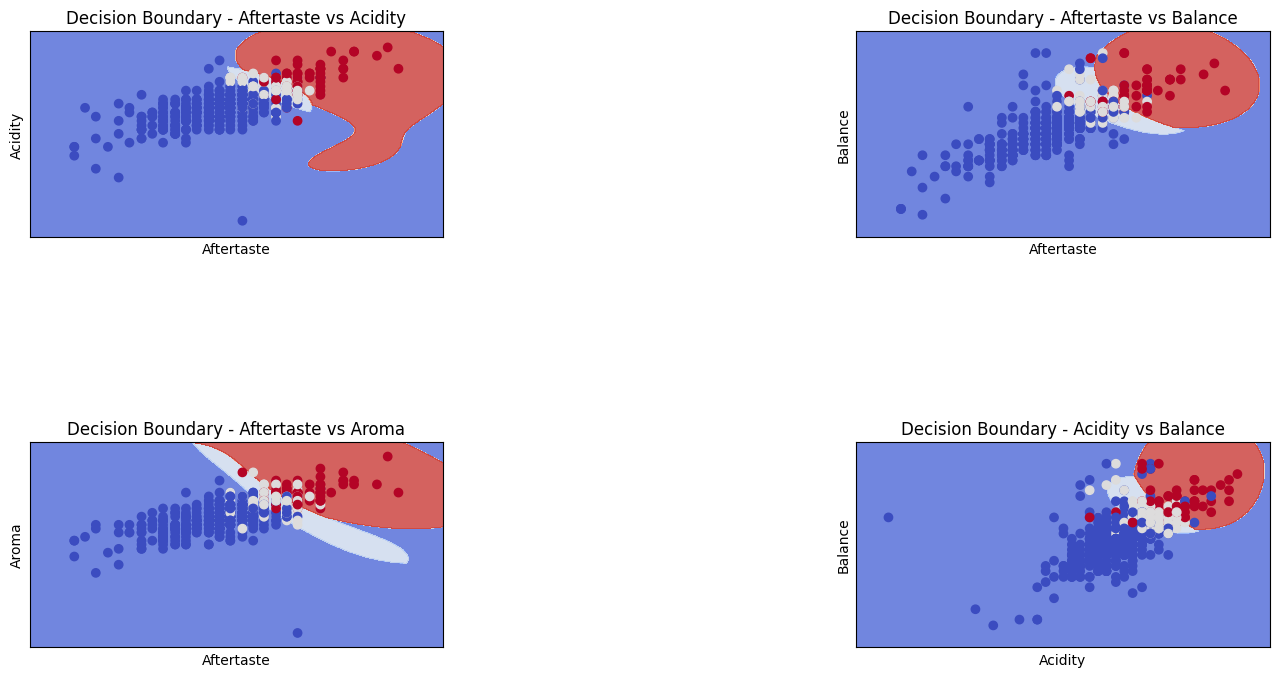

In [ ]:

plt.figure(figsize=(16, 8))
i = 0
for pair in selected_pairs:

  h = .02  # step size in the mesh

  best_svc= SVC(**best_grid_param)
  best_svc.fit(X_train.loc[:,pair],Y_train)

  # create a mesh to plot in
  x_min, x_max = X_train.loc[:,pair].iloc[:, 0].min() - 1, X_train.loc[:,pair].iloc[:, 0].max() + 1
  y_min, y_max = X_train.loc[:,pair].iloc[:, 1].min() - 1, X_train.loc[:,pair].iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  clf = best_svc
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=1, hspace=1)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(X_train.loc[:,pair].iloc[:, 0], X_train.loc[:,pair].iloc[:, 1], c=Y_train.values, cmap=plt.cm.coolwarm)
  plt.xlabel(pair[0])
  plt.ylabel(pair[1])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(f"Decision Boundary - {pair[0]} vs {pair[1]}")
  i += 1

plt.show()

### **Random Search**
**Initialize models and Search Space**
- `Support Vector Machine`

Utilize the search space as provided by the Lab direction.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 37.575, 75.05, 112.525, 150.0], 'gamma': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###

### START CODE HERE ###

kernels = ['linear','rbf','poly']
rand_c_value = list(np.linspace(1,100,5,dtype = float))
rand_gamma = list(np.linspace(0.01,10,5,dtype = float))
rand_degree = [2,3]

param_grid_rand = {
    'kernel': kernels,
    'C': rand_c_value,
    'gamma': rand_gamma,
    'degree': rand_degree
}

svc_model = SVC()

### END CODE HERE ###


### END CODE HERE ###

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [ ]:
### START CODE HERE ###
### START CODE HERE ###
k_values = [4, 6]

# Perform grid search for each value of k
for k in k_values:
    rand_search = RandomizedSearchCV(estimator=svc_model, param_distributions=param_grid_rand, cv=k,n_iter=60)
    rand_search.fit(X_train, Y_train)  # You need to specify your data X and y

    print(f"Best parameters for k={k}: {rand_search.best_params_}")
    print(f"Best score for k={k}: {rand_search.best_score_}")

    # Print mean and standard deviation of scores for all parameter sets
    means = rand_search.cv_results_['mean_test_score']
    stds = rand_search.cv_results_['std_test_score']
    params = rand_search.cv_results_['params']
    print(f"Mean and standard deviation of scores for k={k}:")
    for mean, std, param in zip(means, stds, params):
        print(f"Parameters: {param}, Mean: {mean}, Std: {std}")
    print()



### END CODE HERE ###

top_params_rand = []
for i in range(3):
    best_random = rand_search.cv_results_['params'][i]
    top_params_rand.append(best_random)


print(top_params_rand)



Best parameters for k=4: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 75.25}
Best score for k=4: 0.9074025974025973
Mean and standard deviation of scores for k=4:
Parameters: {'kernel': 'rbf', 'gamma': 7.5024999999999995, 'degree': 3, 'C': 1.0}, Mean: 0.7293506493506493, Std: 0.0020779220779220675
Parameters: {'kernel': 'rbf', 'gamma': 10.0, 'degree': 3, 'C': 25.75}, Mean: 0.7293506493506493, Std: 0.0020779220779220675
Parameters: {'kernel': 'rbf', 'gamma': 2.5075, 'degree': 3, 'C': 25.75}, Mean: 0.752150974025974, Std: 0.011445308891006773
Parameters: {'kernel': 'rbf', 'gamma': 2.5075, 'degree': 2, 'C': 25.75}, Mean: 0.752150974025974, Std: 0.011445308891006773
Parameters: {'kernel': 'rbf', 'gamma': 7.5024999999999995, 'degree': 2, 'C': 100.0}, Mean: 0.7307792207792208, Std: 0.004046866610618905
Parameters: {'kernel': 'poly', 'gamma': 2.5075, 'degree': 2, 'C': 1.0}, Mean: 0.876112012987013, Std: 0.01831615457127396
Parameters: {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'C': 

Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[217   6   1]
 [ 11   32   3]
 [  0    5  26]]
   Precision  Recall  F1-Score  Support
0      0.952   0.969     0.960      224
1      0.744   0.696     0.719       46
2      0.867   0.839     0.852       31

Accuracy:  0.9136212624584718
```

</details>


In [ ]:
### START CODE HERE ###

best_rand_param = rand_search.best_params_
best_rand_model = SVC(**best_rand_param)
best_rand_model.fit(X_train,Y_train)
Y_pred_rand = best_rand_model.predict(X_test)


print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred_grid))

print("Classifiaction Report")
print(classification_report(Y_test,Y_pred_grid))
### END CODE HERE ###

Confusion Matrix
[[227   7   0]
 [  8  25   2]
 [  1   6  25]]
Classifiaction Report
              precision    recall  f1-score   support

           1       0.96      0.97      0.97       234
           2       0.66      0.71      0.68        35
           3       0.93      0.78      0.85        32

    accuracy                           0.92       301
   macro avg       0.85      0.82      0.83       301
weighted avg       0.92      0.92      0.92       301



**Select 4 pairs of features then polt the decision boundary.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

</details>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


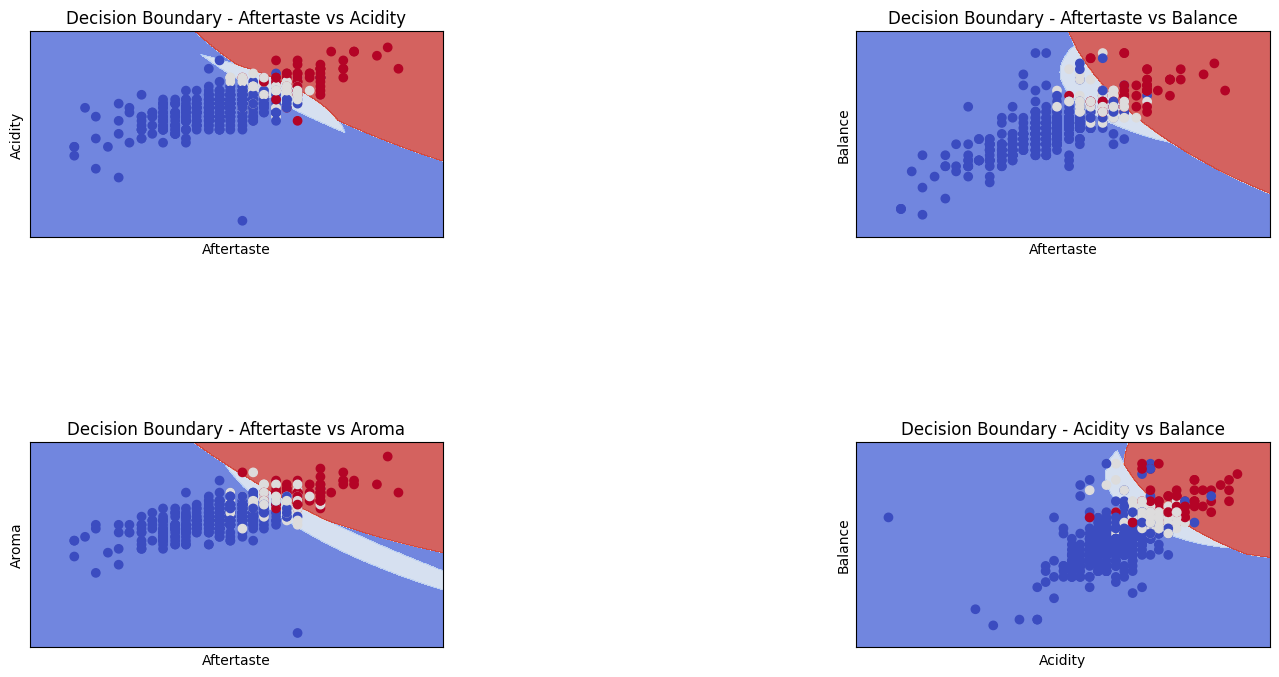

In [ ]:
### START CODE HERE ###

selected_pairs = [('Aftertaste', 'Acidity'),
                  ('Aftertaste', 'Balance'),
                  ('Aftertaste', 'Aroma'),
                  ('Acidity', 'Balance')]


plt.figure(figsize=(16, 8))
i = 0
for pair in selected_pairs:

  h = .02  # step size in the mesh

  best_rand= SVC(**best_rand_param)
  best_rand.fit(X_train.loc[:,pair],Y_train)

  # create a mesh to plot in
  x_min, x_max = X_train.loc[:,pair].iloc[:, 0].min() - 1, X_train.loc[:,pair].iloc[:, 0].max() + 1
  y_min, y_max = X_train.loc[:,pair].iloc[:, 1].min() - 1, X_train.loc[:,pair].iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  clf = best_rand
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=1, hspace=1)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(X_train.loc[:,pair].iloc[:, 0], X_train.loc[:,pair].iloc[:, 1], c=Y_train.values, cmap=plt.cm.coolwarm)
  plt.xlabel(pair[0])
  plt.ylabel(pair[1])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(f"Decision Boundary - {pair[0]} vs {pair[1]}")
  i += 1

plt.show()




### START CODE HERE ###

### Question
1. The dropped feature columns with corr > 0.8 are correlated to which columns?
2. Compare the top 3 best model parameters from gridsearchCV() and randomizedsearchcv(), are they different? Explain.
3. Choose a combination of model parameters that yield the highest standard deviation in cross-validation scores. Enumerate the scores for each cross-validation iteration and provide an explanation for the potential reasons behind the observed variations.
4. Show correlation values between Y output and each X input and how the top 2 highest and 2 lowest correlation of the pair Y and each X related to the decision boundary of 3 class output?

ans

1.Flavor

2.Gird_search

  {'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}

  {'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}

  {'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}

  Rand_search

  {'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'C': 1.0}

  {'kernel': 'linear', 'gamma': 10.0, 'degree': 2, 'C': 50.5}

  {'kernel': 'rbf', 'gamma': 2.5075, 'degree': 3, 'C': 50.5}

  3.Best score for k=4: 0.9145616883116883

Best score for k=6: 0.9116809116809117

ค่า k ที่มากขึ้นจะทำให้มี การแบ่งข้อมูลที่มากขึ้น และรอบการ train ที่เพิ่มขึ้น ส่งผลให้ค่า k ที่มากกว่า จะมีประสิทธิภาพที่ดีกว่า

4.Top 2 highest correlated features

Aftertaste: 0.628

Acidity: 0.609


Top 2 lowest correlated features

Moisture: -0.099

altitude_mean_meters: -0.020